In [ ]:
import numpy as np

from tensorflow.keras.layers import Input, Dense, Activation , Conv2D , Flatten,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import vgg16
import keras
import cv2
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = np.array([cv2.resize(image, (32, 32)) for image in x_train])
x_test = np.array([cv2.resize(image, (32, 32)) for image in x_test])

In [ ]:
print(f'x_test shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')

x_test shape : (60000, 32, 32)
x_test shape : (10000, 32, 32)


## expand the dimension

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_train= np.repeat(x_train, 3, axis=-1)

x_test = np.expand_dims(x_test, axis=-1)
x_test= np.repeat(x_test, 3, axis=-1)

In [ ]:
print(f'x_test shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')

x_test shape : (60000, 32, 32, 3)
x_test shape : (10000, 32, 32, 3)


In [ ]:
# normalize the value between 0 and 1
x_train = x_train/255
x_test = x_test/255

## one hot encoding the label values

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## model vgg16 and last layer changes

In [ ]:
base_model=vgg16.VGG16(
    weights='imagenet',
        input_shape=(32, 32, 3),
        include_top=False
)
base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
inputs = keras.Input(shape=(32, 32, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x=Dense(64, activation='relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 14748170 (56.26 MB)
Trainable params: 33482 (130.79 KB)
Non-trainable params: 14714688 (56.13 MB)
_______________

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 847s 2s/step - loss: 0.6410 - accuracy: 0.8246 - val_loss: 0.2707 - val_accuracy: 0.9280
Epoch 2/10
469/469 [==============================] - 837s 2s/step - loss: 0.2293 - accuracy: 0.9340 - val_loss: 0.1755 - val_accuracy: 0.9497
Epoch 3/10
469/469 [==============================] - 793s 2s/step - loss: 0.1714 - accuracy: 0.9487 - val_loss: 0.1461 - val_accuracy: 0.9552
Epoch 4/10
469/469 [==============================] - 821s 2s/step - loss: 0.1459 - accuracy: 0.9550 - val_loss: 0.1349 - val_accuracy: 0.9566
Epoch 5/10
208/469 [============>.................] - ETA: 6:16 - loss: 0.1385 - accuracy: 0.9583

# Evaluate the model on the test data

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 0.0894 - accuracy: 0.9710 - 3s/epoch - 10ms/step
Test accuracy: 0.9710000157356262


## all of my prediction value

In [ ]:
predicted=model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [ ]:
labels = []

for prediction in predicted:
    label = np.argmax(prediction)  # Get the predicted label for the current image
    labels.append(label)

print(labels[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


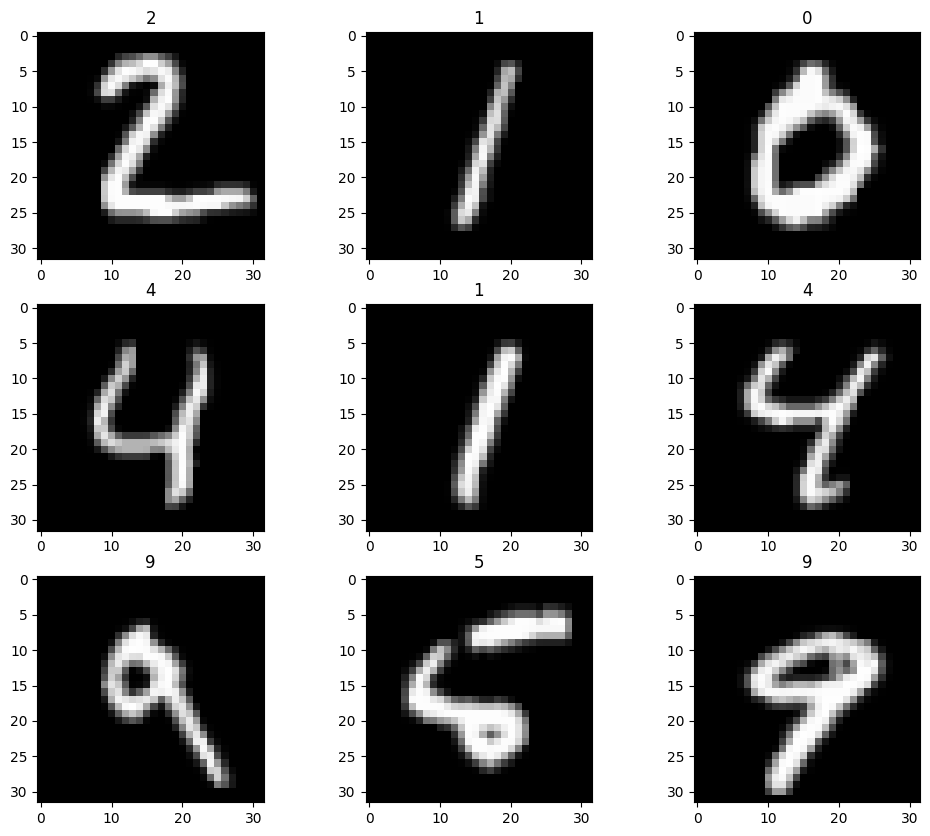

In [ ]:
plt.figure(figsize=(12,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(x_test[i])
    plt.title(labels[i])
plt.show()